# Imports

In [240]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

## Load functions

In [165]:
%run ./functions.py

## Test forceatpoint function

In [4]:
dirvec = np.array([-1,0,0])
x = 0.003;y = 0.018;z = 0.0;
fx,fy,fz = forceatpointconnector(2,x,y,z,dirvec)
display("fx",fx)
display("fy",fy)
display("fz",fz)

'fx'

58.843430664513868

'fy'

-0.0085702238361573535

'fz'

0.0

## Connector field
Draw connector field just in case some wants to see it.

The connector is represented by four magnets at their 3D printed holders with orientation i=1,j=0,k=0

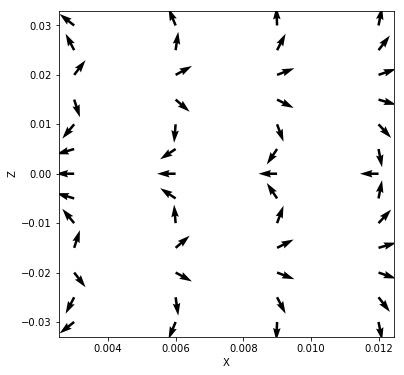

In [5]:
#Points to be plotted
x = np.arange(0.003, 0.013, 0.003)
y = np.arange(-0.03, 0.035, 0.005)
z = np.arange(-0.03, 0.035, 0.005)
X,Z = np.meshgrid(x,z)
Y = 0.0 
#X,Y,Z = np.meshgrid(x,y,z)

# MAGNET PARAMETERS, the same for all magnets
f= 0.0254 #Conversion factor from inches to meters
D = (1/2.0)*f; # Meters
t = (1/8.0)*f; # Meters
Br = 13200 # Gauss
V = volume(D,t)
m = dipMoment(Br, V) # Magnet scalar moment

#POSITION/DIRECTION PARAMETERS
# Position and direction of connector magnets

# Position of magnet 0 (r0) in meters
x0 = 0.0; y0 = 0.0; z0 = 0.018;
r0Vec = np.array([x0, y0, z0])

# Position of magnet 1 (r1) in meters
x1 = 0.0; y1 = 0.018; z1 = 0.0;
r1Vec = np.array([x1, y1, z1])

# Position of magnet 2 (r2) in meters
x2 = 0.0; y2 = 0.0; z2 = -0.018;
r2Vec = np.array([x2, y2, z2])

# Position of magnet 3 (r3) in meters
x3 = 0.0; y3 = -0.018; z3 = 0.0;
r3Vec = np.array([x3, y3, z3])

# Direction of magnets 0,1,2,3
# will be normalized
i = 1;j = 0;k = 0;
dirvec0123 = np.array([i,j,k])

# Calculate magnet 0,1,2,3 moment vector
mVec0123 = dipMomentVec2(m, dirvec0123)

# MAGNETIC FIELD
# Field of magnet 0 at grid points
Bx0,By0,Bz0 = dipfield2(mVec0123,r0Vec,X,Y,Z)

# Field of magnet 1 at grid points
Bx1,By1,Bz1 = dipfield2(mVec0123,r1Vec,X,Y,Z)

# Field of magnet 2 at grid points
Bx2,By2,Bz2 = dipfield2(mVec0123,r2Vec,X,Y,Z)

# Field of magnet 3 at grid points
Bx3,By3,Bz3 = dipfield2(mVec0123,r3Vec,X,Y,Z)

# Total magnetic field
Bxt = Bx0 + Bx1 + Bx2 +Bx3
Byt = By0 + By1 + By2 +By3
Bzt = Bz0 + Bz1 + Bz2 +Bz3

fig = plt.figure(figsize=(6, 6))
#ax = fig.gca(projection='3d')
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#ax.quiver(X, Y, Z, Bxt, Byt, Bzt, length=0.001, normalize=True)
#ax.view_init(0, 30)

ax = fig.gca()
ax.set_xlabel('X')
ax.set_ylabel('Z')

#Normalize arrows
Bxtn = Bxt/((Bxt**2+Bzt**2)**0.5)
Bztn = Bzt/((Bxt**2+Bzt**2)**0.5)

ax.quiver(X,Z,Bxtn,Bztn)

plt.show()

## Two connectors in front of each other
Calculate the force of two opossing connectors directly in front of each other

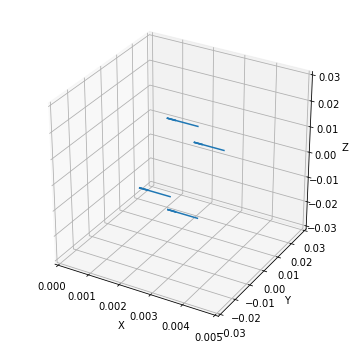

In [6]:
#Define the postions and orientations of the second connector magnets
# Position of magnet 10 (r10) in meters
x10 = 0.003; y10 = 0.0; z10 = 0.018;
r10Vec = np.array([x10, y10, z10])

# Position of magnet 11 (r11) in meters
x11 = 0.003; y11 = 0.018; z11 = 0.0;
r11Vec = np.array([x11, y11, z11])

# Position of magnet 12 (r12) in meters
x12 = 0.003; y12 = 0.0; z12 = -0.018;
r12Vec = np.array([x12, y12, z12])

# Position of magnet 13 (r13) in meters
x13 = 0.003; y13 = -0.018; z13 = 0.0;
r13Vec = np.array([x13, y13, z13])

# Direction of magnets 10,11,12,13
# will be normalized
i = 1;j = 0;k = 0;
dirvec1 = np.array([i,j,k])

#Calculate force on each magnet
fx10,fy10,fz10 = forceatpointconnector(2,x10,y10,z10,dirvec1)
fx11,fy11,fz11 = forceatpointconnector(2,x11,y11,z11,dirvec1)
fx12,fy12,fz12 = forceatpointconnector(2,x12,y12,z12,dirvec1)
fx13,fy13,fz13 = forceatpointconnector(2,x13,y13,z13,dirvec1)

#Plot forces
#Put them in a single array for quiver

xq = np.array([x10, x11, x12, x13])
yq = np.array([y10, y11, y12, y13])
zq = np.array([z10, z11, z12, z13])

fxq = np.array([fx10, fx11, fx12, fx13])
fyq = np.array([fy10, fy11, fy12, fy13])
fzq = np.array([fz10, fz11, fz12, fz13])

fig2 = plt.figure(figsize=(6, 6))
ax1 = fig2.gca(projection='3d')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim(0, 0.005)
ax1.set_ylim(-0.03, 0.03)
ax1.set_zlim(-0.03, 0.03)
ax1.quiver(xq, yq, zq, fxq, fyq, fzq, length=0.001, normalize=True)

plt.show()


### Calculate total force and moment around the center of the connector

In [9]:
#Find total force
Fxt = fx10 + fx11 + fx12 + fx13
Fyt = fy10 + fy11 + fy12 + fy13
Fzt = fz10 + fz11 + fz12 + fz13
F = np.array([Fxt,Fyt,Fzt])
display("F",F)

#Calculate total moment around the center of the connector
# Find connector center
dVec = r10Vec - r12Vec
dhVec = dVec/2
cent = r12Vec+dhVec
display("center",cent)

# Find moment due to force on magnet 10
rc10Vec = r10Vec-cent
display("rc10",rc10Vec)
M10 = np.cross(rc10Vec,np.array([fx10,fy10,fz10]))
display("M10",M10)

# Find moment due to force on magnet 11
rc11Vec = r11Vec-cent
display("rc11",rc11Vec)
M11 = np.cross(rc11Vec,np.array([fx11,fy11,fz11]))
display("M11",M11)

# Find moment due to force on magnet 12
rc12Vec = r12Vec-cent
display("rc12",rc12Vec)
M12 = np.cross(rc12Vec,np.array([fx12,fy12,fz12]))
display("M12",M12)

# Find moment due to force on magnet 13
rc13Vec = r13Vec-cent
display("rc12",rc13Vec)
M13 = np.cross(rc13Vec,np.array([fx13,fy13,fz13]))
display("M13",M13)

# Find total moment at the center of the connector
M = M10 + M11 + M12 + M13
display("M",M)

'F'

array([ -2.35373723e+02,  -1.38777878e-10,  -6.93889390e-11])

'center'

array([ 0.003,  0.   ,  0.   ])

'rc10'

array([ 0.   ,  0.   ,  0.018])

'M10'

array([ 0.        , -1.05918175,  0.        ])

'rc11'

array([ 0.   ,  0.018,  0.   ])

'M11'

array([ 0.        , -0.        ,  1.05918175])

'rc12'

array([ 0.   ,  0.   , -0.018])

'M12'

array([ 0.        ,  1.05918175,  0.        ])

'rc12'

array([ 0.   , -0.018,  0.   ])

'M13'

array([ 0.        , -0.        , -1.05918175])

'M'

array([  0.00000000e+00,   0.00000000e+00,   1.24922295e-12])

## Find rotation matrix from vector a to b (unit vectors)

In [57]:
a = np.array([1,0,0])
b = np.array([1,1,0])
b = b/np.linalg.norm(b)
display("b",b)

if np.array_equal(a,b):
    R = np.identity(3)
else: 
    # Find axis of rotation
    v = np.cross(a,b)
    # Find sine of rotation angle
    s = np.linalg.norm(v)
    # Find cosine of rotation angle
    c = a.dot(b)
    # Form skew-symetric cross product matrix from v
    skv = np.roll(np.roll(np.diag(v.flatten()), 1, 1), -1, 0)
    skv = skv - skv.T
    vx = np.array([[0,-v[2],v[1]],[v[2],0,-v[0]],[-v[1],v[0],0]])
    display(skv)
    display(vx)

    # Find rotation matrix
    R = np.identity(3) + skv + ((1-c)/(s**2))*(skv.dot(skv))
    #R = np.identity(3) + skv + (1/(1+c))*(skv.dot(skv))
    display(R)

    display(R.dot(a))

# Original positions from center
#Position of magnet 10
rc10Vec = np.array([0.0,0.0,0.018])

#Position of magnet 11
rc11Vec = np.array([0.0,0.018,0.0])

#Position of magnet 12
rc12Vec = np.array([0.0,0.0,-0.018])

#Position of magnet 13
rc13Vec = np.array([0.0,-0.018,0.0])

# Rotated positions from center
rc10Vec = R.dot(rc10Vec)
rc11Vec = R.dot(rc11Vec)
rc12Vec = R.dot(rc12Vec)
rc13Vec = R.dot(rc13Vec)

display("rc10Vec",rc10Vec)
display("rc11Vec",rc11Vec)
display("rc12Vec",rc12Vec)
display("rc13Vec",rc13Vec)

'b'

array([ 0.70710678,  0.70710678,  0.        ])

array([[ 0.        , -0.70710678,  0.        ],
       [ 0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

array([[ 0.        , -0.70710678,  0.        ],
       [ 0.70710678,  0.        , -0.        ],
       [-0.        ,  0.        ,  0.        ]])

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

array([ 0.70710678,  0.70710678,  0.        ])

'rc10Vec'

array([ 0.   ,  0.   ,  0.018])

'rc11Vec'

array([-0.01272792,  0.01272792,  0.        ])

'rc12Vec'

array([ 0.   ,  0.   , -0.018])

'rc13Vec'

array([ 0.01272792, -0.01272792,  0.        ])

## Force on connector
Find the total and individual forces and moments on a connector placed in point x and direction dirvec, from a connector at the origin with direction i=1,j=0,k=0

'F'

array([ -2.35373723e+02,  -1.38777878e-10,  -6.93889390e-11])

'M'

array([  0.00000000e+00,   0.00000000e+00,   1.24922295e-12])

'r13Vec'

array([ 0.003, -0.018,  0.   ])

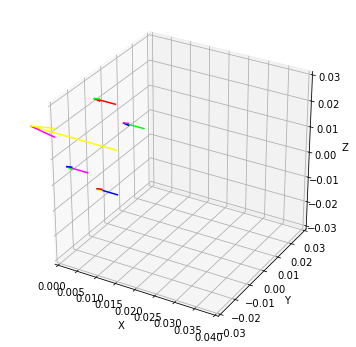

In [334]:
dirvec = np.array([1,0,0])
x = np.array([0.003,0.0,0.0]) 
P = forceonconnector(x,dirvec)
F,M,f10,f11,f12,f13,m10,m11,m12,m13,r10Vec,r11Vec,r12Vec,r13Vec = P[0:14]

display("F",F)
display("M",M)
display("r13Vec",r13Vec)


#Plot forces
#Put them in a single array for quiver
xq = np.array([r10Vec[0], r11Vec[0], r12Vec[0], r13Vec[0],x[0]])
yq = np.array([r10Vec[1], r11Vec[1], r12Vec[1], r13Vec[1],x[1]])
zq = np.array([r10Vec[2], r11Vec[2], r12Vec[2], r13Vec[2],x[2]])

fxq = np.array([f10[0], f11[0], f12[0], f13[0],F[0]])
fyq = np.array([f10[1], f11[1], f12[1], f13[1],F[1]])
fzq = np.array([f10[2], f11[2], f12[2], f13[2],F[2]])

fig3 = plt.figure(figsize=(6, 6))
ax2 = fig3.gca(projection='3d')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim(0, 0.04)
ax2.set_ylim(-0.03, 0.03)
ax2.set_zlim(-0.03, 0.03)
ax2.quiver(xq, yq, zq, fxq, fyq, fzq, length=0.0001, normalize=False,color = np.array([[1,0,0,1],[0,1,0,1],[0,0,1,1],[1,0,1,1],[1,1,0,1]]))

plt.show()

## Force over distance for aligned connectors in x
The first connector is aligned with the second connector in the center, both connectors have direction i=1,j=0,k=0. x is varied as if separating the connectors

array(-46.47367418274609)

-46.473674182746088

0.0044999999999999971

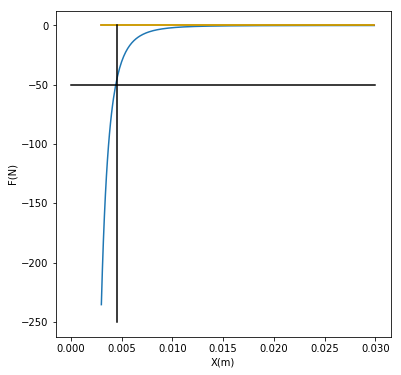

In [335]:
xpoints = np.arange(0.003,0.03,0.0001)
dirvec = np.array([1,0,0])
FX = []
FY = []
FZ = []
for i in np.nditer(xpoints):   
    x = np.array([i,0.0,0.0]) 
    P = forceonconnector(x,dirvec)
    F = P[0]
    FX.append(F[0])
    FY.append(F[1])
    FZ.append(F[2])
    
FX = np.array(FX)
FY = np.array(FY)
FZ = np.array(FZ)
thr = -50

it = np.nditer(FX,flags=['c_index'])
for i in it:
    if i >= thr:
        pos = it.index
        val = i
        break

display(val)
display(FX[pos])
display(xpoints[pos])

fig4 = plt.figure(figsize=(6, 6))
ax3 = fig4.gca()
ax3.plot(xpoints,FX)
ax3.plot(xpoints,FY,'r')
ax3.plot(xpoints,FZ,'y')
ax3.set_xlabel('X(m)')
ax3.set_ylabel('F(N)')

ax3.plot((0, 0.03), (thr, thr), 'k-')
ax3.plot((xpoints[pos], xpoints[pos]), (0, -250), 'k-')
plt.savefig('./forcexaligned.eps', format='eps', dpi=1000)
plt.show()    
    

## Force over distance for aligned connectors in y
The first connector is aligned with the second at the center, both connectors have the same direction i=1,j=0,k=0. x is maintained at 0.006 m, y is varied as if misaligning the connectors 

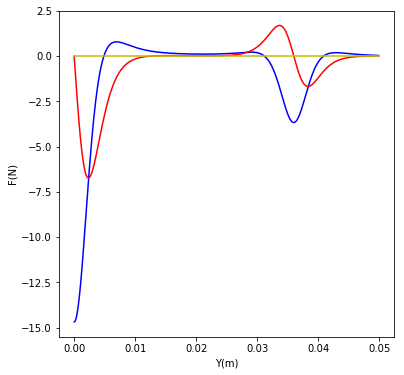

In [336]:
ypoints = np.arange(0.0,0.05,0.0001)
dirvec = np.array([1,0,0])
FX = []
FY = []
FZ = []
for i in np.nditer(ypoints):   
    x = np.array([0.006,i,0.0]) 
    P = forceonconnector(x,dirvec)
    F = P[0]
    FX.append(F[0])
    FY.append(F[1])
    FZ.append(F[2])
    
FX = np.array(FX)
FY = np.array(FY)
FZ = np.array(FZ)

fig5 = plt.figure(figsize=(6, 6))
ax4 = fig5.gca()
ax4.plot(ypoints,FX,'b')
ax4.plot(ypoints,FY,'r')
ax4.plot(ypoints,FZ,'y')
ax4.set_xlabel('Y(m)')
ax4.set_ylabel('F(N)')
plt.savefig('./forcemisalign.eps', format='eps', dpi=1000)
plt.show()    


## Force for turning movement in x,z
Both connectors are aligned at the center and have the same direction i=1,j=0,k=0. x and z are varied so that the second connector describes a circular motion towards positive x and z with center at the top z border

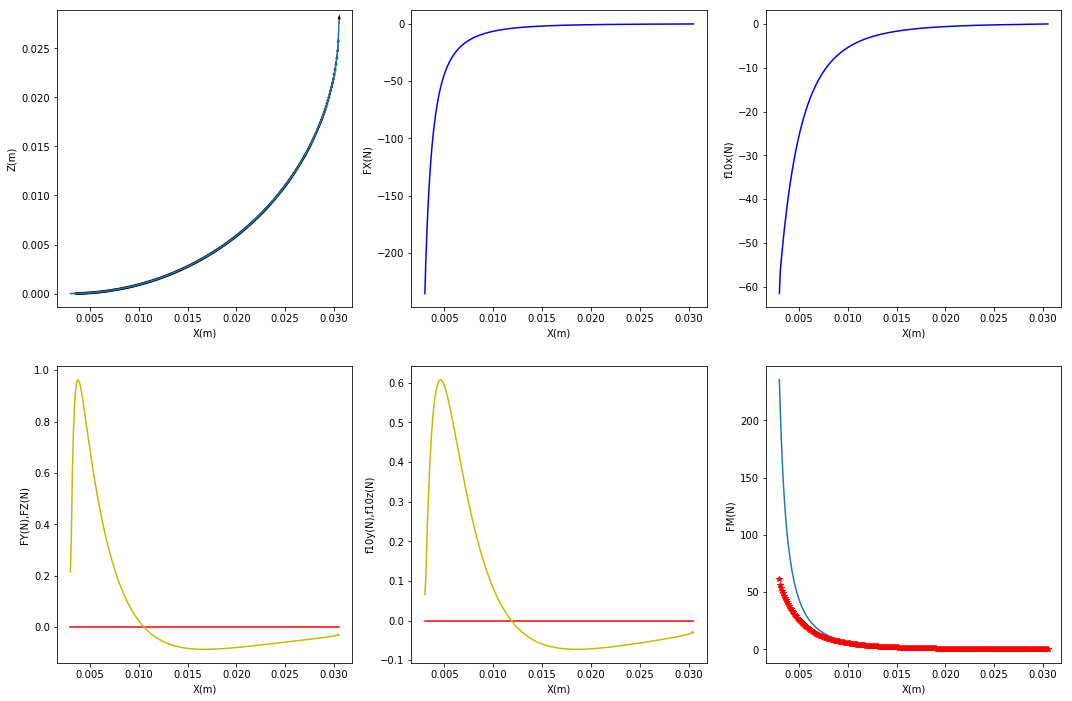

In [337]:
# point separation
h = 0.0001 
xpoints = np.arange(0.003,0.0306,h)

zpoints =  0.0275 - np.sqrt((0.0275**2)-((xpoints-0.003)**2)) 
m = np.gradient(zpoints,h)
dz = m*h
dx = np.ones(xpoints.size)*h
dxn = dx/(dx**2+dz**2)**0.5
dzn = dz/(dx**2+dz**2)**0.5

FX = []
FY = []
FZ = []
FM = []
f10x = []
f10y = []
f10z = []
f10m = []

it = range(0,xpoints.size)

for i in it:
    x = np.array([xpoints[i],0.0,zpoints[i]])
    dirvec = np.array([dx[i],0,dz[i]])
    P = forceonconnector(x,dirvec)
    F = P[0]
    f10 = P[2]
    FX.append(F[0])
    FY.append(F[1])
    FZ.append(F[2])
    FM.append(np.linalg.norm(F))
    f10x.append(f10[0])
    f10y.append(f10[1])
    f10z.append(f10[2])
    f10m.append(np.linalg.norm(f10))
    

    
FX = np.array(FX)
FY = np.array(FY)
FZ = np.array(FZ)
FM = np.array(FM)
f10x = np.array(f10x)
f10y = np.array(f10y)
f10z = np.array(f10z)
f10m = np.array(f10m)


fig6 = plt.figure(figsize=(18, 12))
ax5 = [fig6.add_subplot(231),
      fig6.add_subplot(232),
      fig6.add_subplot(233),
      fig6.add_subplot(234),
      fig6.add_subplot(235),
      fig6.add_subplot(236)]
ax5[0].plot(xpoints,zpoints)
ax5[0].set_xlabel('X(m)')
ax5[0].set_ylabel('Z(m)')

ax5[0].quiver(xpoints,zpoints,dxn,dzn)

ax5[1].plot(xpoints,FX,'b')
ax5[1].set_xlabel('X(m)')
ax5[1].set_ylabel('FX(N)')

ax5[3].plot(xpoints,FY,'r')
ax5[3].plot(xpoints,FZ,'y')
ax5[3].set_xlabel('X(m)')
ax5[3].set_ylabel('FY(N),FZ(N)')

ax5[2].plot(xpoints,f10x,'b')
ax5[2].set_xlabel('X(m)')
ax5[2].set_ylabel('f10x(N)')

ax5[4].plot(xpoints,f10y,'r')
ax5[4].plot(xpoints,f10z,'y')
ax5[4].set_xlabel('X(m)')
ax5[4].set_ylabel('f10y(N),f10z(N)')

ax5[5].plot(xpoints,FM)
ax5[5].plot(xpoints,f10m,'*r')

ax5[5].set_xlabel('X(m)')
ax5[5].set_ylabel('FM(N)')
plt.savefig('./forcecircular.eps', format='eps', dpi=1000)
plt.show()
